# Example to run inversion using box model
The inversion estimates the emissions deviation from some a priori value

In [1]:
from py12box_invert import core, utils
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from py12box_invert.paths import Paths
from py12box_invert.invert import Invert, Matrices

species = "CFC-11"
project_path = Paths.data / f"example/{species}"

This runs the inversion to estimate yearly emissions different to a priori for each box

In [2]:
inv = Invert(project_path, species, method="rigby14", ic_years=3)
inv.run_sensitivity(freq="yearly")
inv.run_spinup(nyears=10)
inv.run_initial_conditions()
inv.create_matrices(sigma_P=1.)
inv.run_inversion()
inv.posterior()
inv.process_outputs(scale_error=0.02, lifetime_error=0.1)

No inital conditions file. 
 Assuming zero initial conditions
Compiling model and tuning lifetime...
... completed in 3 iterations
... stratospheric lifetime: 52.1
... OH lifetime: 1e12
... ocean lifetime: 1e12
... non-OH tropospheric lifetime: 1e12
... overall lifetime: 52.0
... done in 5.624457120895386 s
Model reference run...
... done in 0.04159879684448242 s
Calculating sensitivity on 12 threads...
... done
Spinning up for 10 years...
... done


Mole fraction plot

In [ ]:
inv.plot_mf()

Plot the results

In [ ]:
inv.plot_emissions()

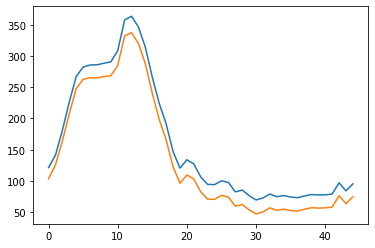

In [3]:
plt.plot(inv.outputs.emissions_global_annual[0] + inv.outputs.emissions_global_annual[1])
plt.plot(inv.outputs.emissions_global_annual[0] - inv.outputs.emissions_global_annual[1])